## Final Project Submission

Please fill out:
* Student name: Rachel Spiro
* Student pace: self paced
* Scheduled project review date/time: Oct. 28, 2019
* Instructor name: Eli Thomas
* Blog post URL: https://rspiro9.github.io/project_1_complete


# Introduction
The purpose of this project is to develop a model that can predict the price of homes in Kings County based off of the different variables that are avialable to analyze.

# Data Science Process
For this analysis, I will be using the OSEMN process to analyze the data, which is commonly used in data science. Below are the 5 steps that will be taken:

1. **Obtain** - Import the data, take an initial look through the data, and gather all necessary information and resources.
2. **Scrub** - This is when we will pre-process and clean our data so that it is ready for analysis. Steps include changing to appropriate datatypes, investigating multicolinearity, removing unnecesary data/columns, and identifying categorical data.
3. **Explore** - Dive into the data through analyses and visualizations to better understand what we need to model.
4. **Model** - Build and fit model appropriate to the dataset. Adjust and approve model to best fit the data.
5. **Interpret** - Look at the results of the model and evaluate what they mean. Communicate these results to key stakeholders so that they are aware of your findings.


# Part 1: OBTAIN

I will begin by importing the necessary libraries. I will then import the dataset and take an initial look through to see what is included.

## Import Libraries

In [1]:
# Import relevant libraries for the data, linear algebra, and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white')

# Import relevant libraries for modeling and evaluation
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn import metrics


## Import Data

In [2]:
# Read in the data using pandas and look at first 10 rows to get an initial look at the data
kch_data = pd.read_csv('kc_house_data.csv')
kch_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


This dataset includes 21 columns. From an initial glance, I can already see some NaNs and weird ? datapoints in a few of the columns that will need to be cleaned up. For a better understanding of the data included, here is a brief description of each column:

* **id** - Unique number identified for a house
* **Date** - date the house was sold
* **Price** -  The prediction target
* **bedroomsNumber** -  # of bedrooms per house
* **bathroomsNumber** -  # of bathrooms per house
* **sqft_livingsquare** -  Square footage of the home
* **sqft_lotsquare** -  Square footage of the lot
* **floorsTotal** -  Total # of floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - House has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - Overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Square footage of house apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year the house was built
* **yr_renovated** - Year when house was renovated
* **zipcode** - Zipcode of house
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Part 2: SCRUBBING DATA

I will take 5 different steps during this part. Since machine learning only works with numerical data, I will first start by looking at the datatypes and changing to numerical data where appropriate. Second, I will deal with removing/fixing null values. Third, I will investigate potential multicolinearity. Fourth, I will remove any unnecessary columns. And Fifth, I will assign features as categorical rather than numerical where appropiate.
### 2.1 Dealing With Datatypes
Lets look at a summary of the data info to determine which columns need to be adjusted.

In [3]:
# Summary of data
kch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It looks like we have 2 columns (date and sqft_basement) that both have an 'object' type, meaning that they are not numerical. The 'object' type will not work with our anaylsis, so we will need to make some adjustments to both of these columns.
#### sqft_basement
Lets see what values are making this column non-numerical

In [4]:
kch_data.sqft_basement.value_counts()[:10]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
Name: sqft_basement, dtype: int64

The first thing I notice is that we have 454 values of '?' in the data, which is what we will need to change. Since these 454 '?' are such a small portion of the total data and it would be difficult to determine their true value, we will replace them with zeros.

In [5]:
# Replace ? with zeros
kch_data.sqft_basement = (kch_data['sqft_basement'].replace('?',0)).astype('float64')

#### date
For the date column, we will need to change the data to datetime format so that it is a numerical value.

In [6]:
# Change date to datetime
kch_data.date = pd.to_datetime(kch_data.date)
kch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

### 2.2 Dealing With Null Values

Having null values will hinder our ability to build a model for this data, so we will need to either remove columns/rows with null values, or replace the null values. I will first determine which columns include null values and will then decide how to best proceed with each.

In [7]:
# See the number of null values in each column
kch_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront, view, and yr_renovated all have null values. Lets investigate each a bit further to determine how to proceed.
#### Waterfront

In [8]:
# See what waterfront data consists of. How many unique values are there and what are those values? 
print('# Of Waterfront Unique Values:', kch_data['waterfront'].nunique())
print('Each Unique Waterfront Value:')
print(kch_data['waterfront'].value_counts())

# Of Waterfront Unique Values: 2
Each Unique Waterfront Value:
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [9]:
# Since the vast majority of waterfront values are zero, replace NaNs with zero
kch_data.waterfront = kch_data.waterfront.fillna(value=0)

#### View

In [10]:
# See what view data consists of. How many unique values are there and what are those values? 
print('# Of View Unique Values:', kch_data['view'].nunique())
print('Each Unique View Value:')
print(kch_data['view'].value_counts())

# Of View Unique Values: 5
Each Unique View Value:
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [11]:
# Since the vast majority of view reponses are zeros and we only have 64 NaN values, replace all NaN values with zeros.
kch_data.view = kch_data.view.fillna(value=0)

#### Yr_renovated

In [12]:
# See what view data consists of. How many unique values are there? 
print('# Of Year Renovated Unique Values:', kch_data['yr_renovated'].nunique())

# Of Year Renovated Unique Values: 70


In [13]:
# Since the year renovated data looks to be more continuous with 70 different values, 
# we can replace NaNs with the median
kch_data.yr_renovated = kch_data.yr_renovated.fillna(value=kch_data['yr_renovated'].median())

# Check to make sure we have removed all NaN values
kch_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2.3 Investigate Potential Multicollinearity
Multicollinearity is a phenomenon in a multiple regression analysis when two variables are highly linearly related. This is a problem because in linear regression you are suppose to be able to change one variable while keeping all others constant. But, if we have linearly related variables, then we are unable to keep all variables constant.  Therefore, we need to investigate if we have any multicollinearity to be dealt with in our data.

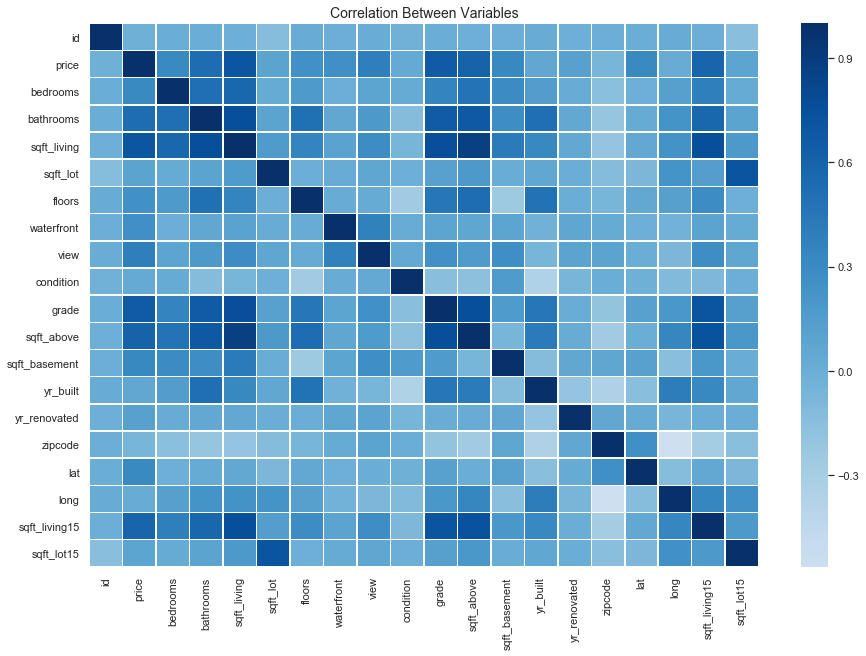

In [14]:
# Plot a correlation matrix to show the correlation (relationship) between all variables. 
plt.figure(figsize=(15,10))
sns.heatmap(kch_data.corr(), center=0, linewidths=.5, cmap="Blues");
plt.title('Correlation Between Variables', fontdict={'fontsize': 14})
plt.show()

The above chart shows the correlations bewteen each of the variables, with darker squares refering to higher correlations. We can see that sqft_living and sqft_above seem to be very highly correlated. Therefore we should remove one of these variables to avoid multicollinearty issues. I will remove sqft_above since that value (which is the sqft above the basement) should be included within sqft_living values (which is the sqft of the whole house).

In [15]:
# Remove sqft_above column
kch_data.drop('sqft_above', axis=1, inplace=True)

### 2.4 Removing Unnecessary Columns

The ID column does not have any data that will be useful for our analysis, so I will remove that column.

In [16]:
kch_data.drop('id', axis=1, inplace=True)

### 2.5 Deal With Categorical Data

To use categorical data in regression models, we first have to transfrom the data to a form that will make sense for the model. Therefore, we will need to determine which variables are categorical and identify them appropriately in our dataset. Lets first look at scatterplots of each variable with price, which will help us determine which data is categorical.

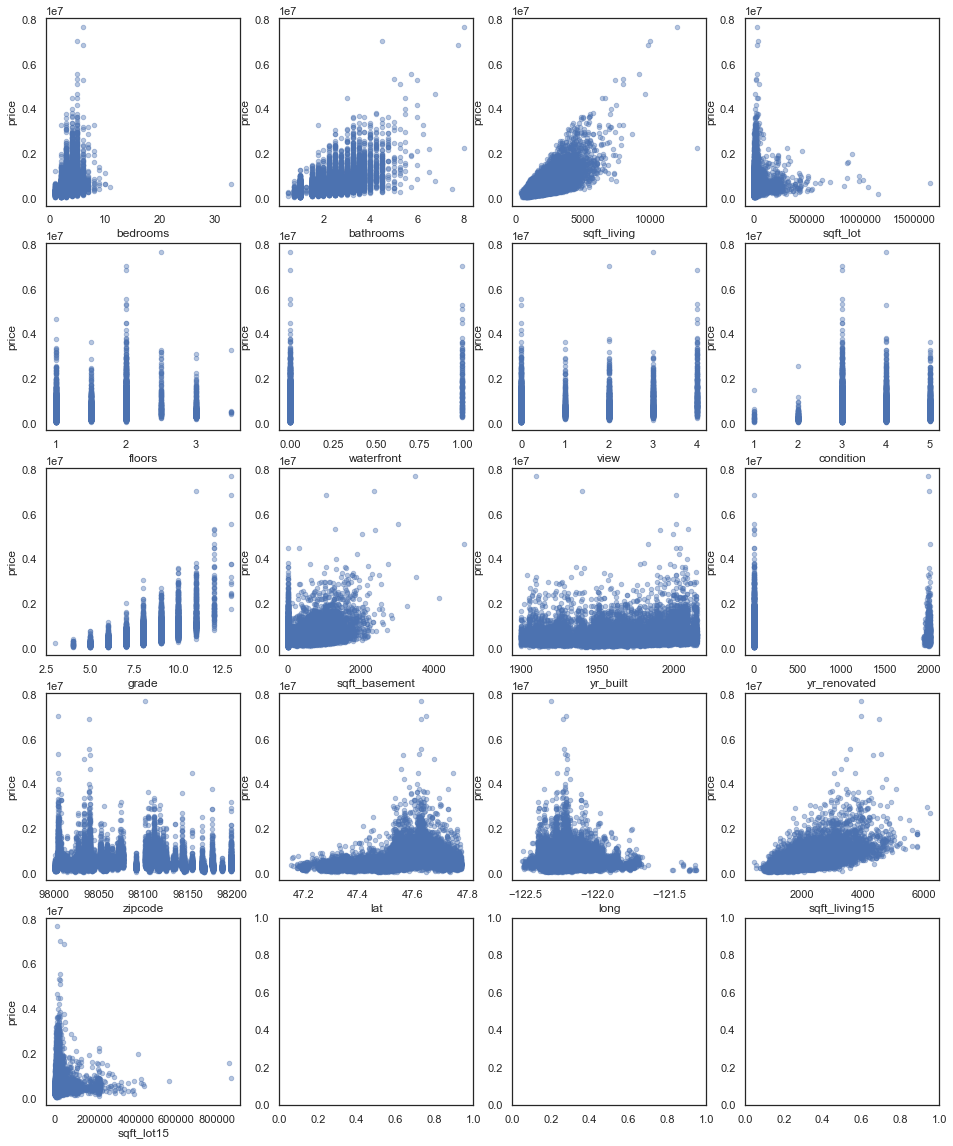

In [17]:
# Scatterplot of each variable with price
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,20))
for i, xcol in enumerate(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
                         'view','condition','grade','sqft_basement','yr_built','yr_renovated',
                         'zipcode','lat','long','sqft_living15','sqft_lot15']):
    kch_data.plot(kind='scatter', x=xcol, y='price', ax=axes[i//4][i % 4], alpha=0.4, color='b')

It looks like floors, waterfront, view, condition, yr_renovated, and sqft_basement all have a couple of vertical lines in their scatterplots and therefore can be considered categorical. I will change floors, waterfront, view, and condition to categorical data columns and perform one hot encoding on them (this converts each category into a new column so it can be used for regresion analysis). For sqft_basement I am going to do binning in order to assign each value to either having a basement or not having a basement. I am going to keep yr_renovated as is for now because I would like to utilize this to investigate the data a bit more, but will transofrm this variable later on, prior to building my model.

In [18]:
# Change columns to category type
kch_data.floors = kch_data.floors.astype('category')
kch_data.waterfront = kch_data.waterfront.astype('category')
kch_data.view = kch_data.view.astype('category')
kch_data.condition = kch_data.condition.astype('category')

# Do one hot encoding
floors_dummies = pd.get_dummies(kch_data.floors, prefix='floor', drop_first=True)
waterfront_dummies = pd.get_dummies(kch_data.waterfront, prefix='waterfront', drop_first=True)
view_dummies = pd.get_dummies(kch_data.view, prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(kch_data.condition, prefix='condition', drop_first=True)

# Drop original columns and add new dummy columns to the dataset
kch_data = kch_data.drop(["floors","waterfront","view","condition"], axis=1)
kch_data = pd.concat([kch_data,floors_dummies,waterfront_dummies,view_dummies,condition_dummies], axis=1)

# Do binning for sqft_basement and then do one hot encoding, drop original columns, and add new dummy column
bins = [-1, 1, kch_data.sqft_basement.max()]
labels = ["0","1"]
kch_data.sqft_basement = pd.cut(kch_data['sqft_basement'], bins, labels=labels)
kch_data.sqft_basement = kch_data.sqft_basement.astype('category')
sqft_basement_dummies = pd.get_dummies(kch_data.sqft_basement, prefix='basement', drop_first=True)
kch_data = kch_data.drop(["sqft_basement"], axis=1)
kch_data = pd.concat([kch_data, sqft_basement_dummies], axis=1)

In [19]:
# Check that everything worked correctly
kch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
date              21597 non-null datetime64[ns]
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
grade             21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
floor_1.5         21597 non-null uint8
floor_2.0         21597 non-null uint8
floor_2.5         21597 non-null uint8
floor_3.0         21597 non-null uint8
floor_3.5         21597 non-null uint8
waterfront_1.0    21597 non-null uint8
view_1.0          21597 non-null uint8
view_2.0          21597 non-null uint8
view_3.0      

# Part 3: Exploring The Data

Now that we have a scrubbed dataset, lets take a look at the non-categorical data. There are a few questions that I would like to answer:
1. What house features drive up price?
2. Which location is most desirable?
3. When is the best time to sell a house?
4. Do people prefer new or newly renovated houses to older homes?

#### 1. What house features drive up price?

In [20]:
# See which variables are most correlated with the price.
abs(kch_data.corr())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,yr_renovated,zipcode,lat,...,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,basement_1
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.667951,0.053953,0.117855,0.053402,0.306692,...,0.264306,0.092597,0.147179,0.182932,0.303059,0.051432,0.006948,0.030759,0.057531,0.178264
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.356563,0.155670,0.017900,0.154092,0.009951,...,0.002127,0.021943,0.045145,0.049942,0.033127,0.049463,0.005210,0.009841,0.027500,0.158412
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.665838,0.507173,0.047177,0.204786,0.024280,...,0.063629,0.037935,0.087022,0.111907,0.105789,0.075933,0.190790,0.166756,0.034765,0.159863
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.762779,0.318152,0.051060,0.199802,0.052155,...,0.104637,0.066582,0.133782,0.158322,0.166730,0.063984,0.102061,0.083850,0.018284,0.201198
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,0.114731,0.052946,0.004979,0.129586,0.085514,...,0.021459,0.008208,0.037529,0.074124,0.019230,0.037871,0.011589,0.013284,0.014452,0.034889
grade,0.667951,0.356563,0.665838,0.762779,0.114731,1.000000,0.447865,0.015623,0.185771,0.113575,...,0.082818,0.048549,0.120708,0.141873,0.146188,0.084788,0.196419,0.140140,0.083974,0.050701
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.447865,1.000000,0.202555,0.347210,0.148370,...,0.024487,0.034386,0.045321,0.019073,0.020983,0.066977,0.391418,0.257155,0.244382,0.163992
yr_renovated,0.117855,0.017900,0.047177,0.051060,0.004979,0.015623,0.202555,1.000000,0.062397,0.027970,...,0.073939,0.028180,0.022190,0.052793,0.067533,0.008298,0.064339,0.052031,0.026238,0.044838
zipcode,0.053402,0.154092,0.204786,0.199802,0.129586,0.185771,0.347210,0.062397,1.000000,0.266742,...,0.028923,0.042930,0.052265,0.040933,0.040855,0.023668,0.017704,0.060765,0.058595,0.159599
lat,0.306692,0.009951,0.024280,0.052155,0.085514,0.113575,0.148370,0.027970,0.266742,1.000000,...,0.012157,0.017462,0.005015,0.013364,0.013935,0.022582,0.042342,0.057545,0.025754,0.136602


From looking at the first column, it looks like the size of the house and neighboring houses, grade, number of bathrooms, number of bedrooms, waterfront view, and latitude are most correlated with price. Lets take a closer look at these to better understand their relationship with price. 

/Users/rachelspiro/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


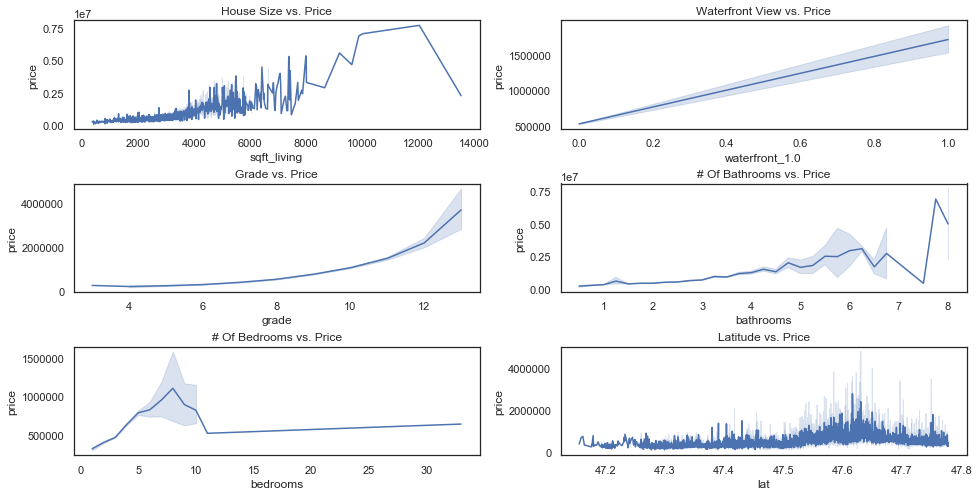

In [21]:
# Plot price vs. each of the variables most correlated with price
plt.figure(figsize=(16,8))

plt.subplot(321)
sns.lineplot(kch_data.sqft_living, kch_data.price)
plt.title('House Size vs. Price')
plt.subplot(322)
sns.lineplot(kch_data['waterfront_1.0'], kch_data.price)
plt.title('Waterfront View vs. Price')
plt.subplot(323)
sns.lineplot(kch_data.grade, kch_data.price)
plt.title('Grade vs. Price')
plt.subplot(324)
sns.lineplot(kch_data.bathrooms, kch_data.price)
plt.title('# Of Bathrooms vs. Price')
plt.subplot(325)
sns.lineplot(kch_data.bedrooms, kch_data.price)
plt.title('# Of Bedrooms vs. Price')
plt.subplot(326)
sns.lineplot(kch_data.lat, kch_data.price)
plt.title('Latitude vs. Price')

plt.subplots_adjust(hspace=0.5)
plt.show()

Besides latitude, the rest of these features all seem to have a positive relationship with price. Therefore, from our initial glance, it would seem that changing any of these could have an impact on the price of the home.

#### 2. Which location is most desirable?
Often, more expensive houses are clustered around certain locations. The chart below shows the location of each house based off of its latitude and longitude coordinates. The color of each circle represents the price of the house, with darker circles indicating a higher price. It seems like houses to the north or more expensive than houses to the south.  There also looks to be a decent sized cluster of expensive houses near lat 47.6 and long-122.2.

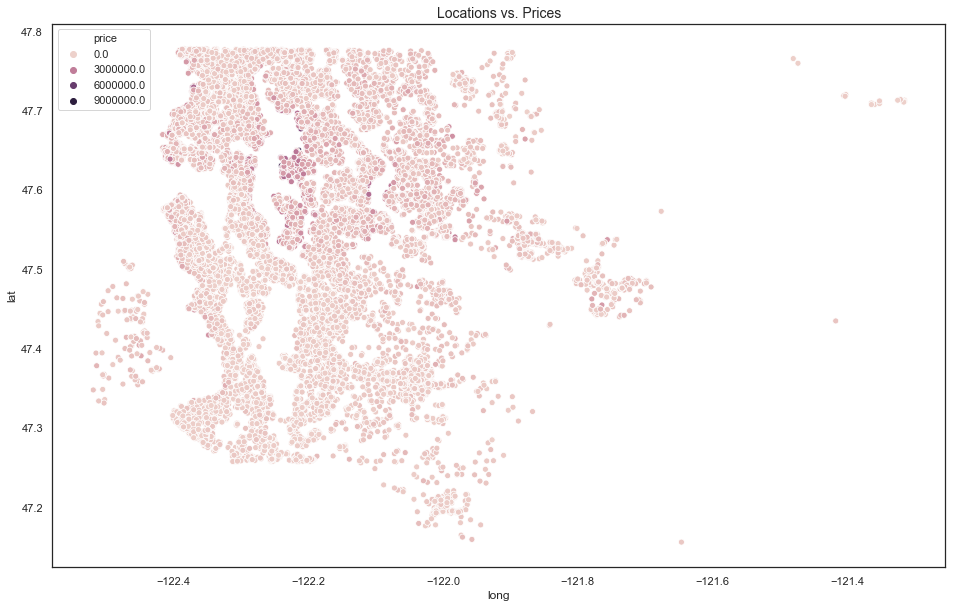

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(kch_data.long, kch_data.lat, hue=kch_data.price)
plt.title('Locations vs. Prices', fontdict={'fontsize': 14})
plt.show()

#### 3. When is the best time to sell a house?

Lets start by looking at the range of years houses have been sold.

In [23]:
kch_data.date.max()-kch_data.date.min()

Timedelta('390 days 00:00:00')

It looks like we only have data for houses sold in just over the last year. Therefore, rather than looking at which year had the best sales, lets look at months and days individually.

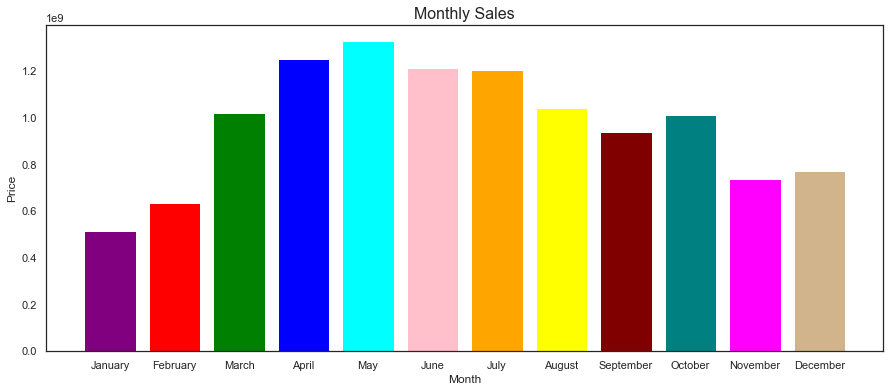

In [24]:
# Plot total sales per month

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(15,6))
data_plot = kch_data.price.groupby(pd.DatetimeIndex(kch_data['date']).month).sum()
plt.bar(months, data_plot,color=['purple', 'red', 'green', 'blue', 'cyan','pink', 'orange', 'yellow', 
                                 'maroon', 'teal','magenta','tan'])
plt.xlabel("Month")
plt.ylabel("Price")
plt.title('Monthly Sales', fontdict={'fontsize': 16})
plt.show()

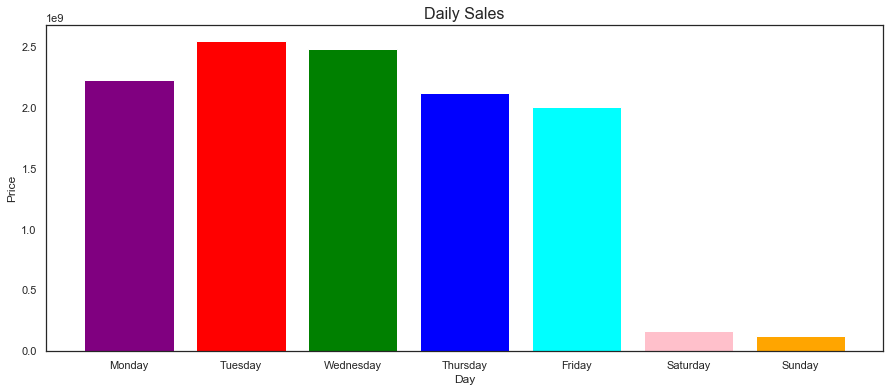

In [25]:
# Plot total sales per day of the week
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(15,6))
data_plot2 = kch_data.price.groupby(pd.DatetimeIndex(kch_data['date']).dayofweek).sum()
plt.bar(day_of_week, data_plot2, color=['purple', 'red', 'green', 'blue', 'cyan','pink', 'orange'])
plt.xlabel("Day")
plt.ylabel("Price")
plt.title('Daily Sales', fontdict={'fontsize': 16})
plt.show()

It appears that the best time to sell a house would be during the spring/summer months (March-August) and on a weekday, particularly Monday-Wednesday.
Since we no longer need the 'date' column, I will remove it from the dataset.

In [26]:
kch_data.drop('date', axis=1, inplace=True)

#### 4. Do people prefer new or newly renovated houses to older homes?

Lets take a look at how many houses purchased were built in each decade. For those houses that were renovated, we'll look at the renovation date rather than the year built to capture the most recent work done on the house.

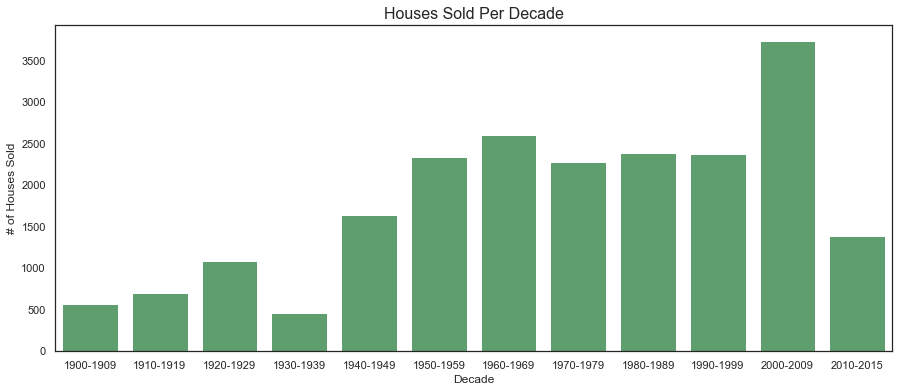

In [27]:
# Group data by decades. First group by yr_built on houses that were not renovated. Then look at yr_renovated for 
# houses that were renovated. This will allow us to capture the more recent year the house has been worked on. The
# first house was built in 1900 so we will start our timeframe then.

# Non-renovated houses
decade1 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1900) & (kch_data["yr_built"]<=1909)]
decade2 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1910) & (kch_data["yr_built"]<=1919)]
decade3 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1920) & (kch_data["yr_built"]<=1929)]
decade4 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1930) & (kch_data["yr_built"]<=1939)]
decade5 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1940) & (kch_data["yr_built"]<=1949)]
decade6 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1950) & (kch_data["yr_built"]<=1959)]
decade7 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1960) & (kch_data["yr_built"]<=1969)]
decade8 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1970) & (kch_data["yr_built"]<=1979)]
decade9 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1980) & (kch_data["yr_built"]<=1989)]
decade10 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 1990) & (kch_data["yr_built"]<=1999)]
decade11 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 2000) & (kch_data["yr_built"]<=2009)]
decade12 = kch_data.loc[(kch_data['yr_renovated']==0) & (kch_data["yr_built"] >= 2010) & (kch_data["yr_built"]<=2019)]

# Renovated houses
decade1r = kch_data.loc[(kch_data["yr_renovated"] >= 1900) & (kch_data["yr_renovated"]<= 1909)]
decade2r = kch_data.loc[(kch_data["yr_renovated"] >= 1910) & (kch_data["yr_renovated"]<= 1919)]
decade3r = kch_data.loc[(kch_data["yr_renovated"] >= 1920) & (kch_data["yr_renovated"]<= 1929)]
decade4r = kch_data.loc[(kch_data["yr_renovated"] >= 1930) & (kch_data["yr_renovated"]<= 1939)]
decade5r = kch_data.loc[(kch_data["yr_renovated"] >= 1940) & (kch_data["yr_renovated"]<= 1949)]
decade6r = kch_data.loc[(kch_data["yr_renovated"] >= 1950) & (kch_data["yr_renovated"]<= 1959)]
decade7r = kch_data.loc[(kch_data["yr_renovated"] >= 1960) & (kch_data["yr_renovated"]<= 1969)]
decade8r = kch_data.loc[(kch_data["yr_renovated"] >= 1970) & (kch_data["yr_renovated"]<= 1979)]
decade9r = kch_data.loc[(kch_data["yr_renovated"] >= 1980) & (kch_data["yr_renovated"]<= 1989)]
decade10r = kch_data.loc[(kch_data["yr_renovated"] >= 1990) & (kch_data["yr_renovated"]<= 1999)]
decade11r = kch_data.loc[(kch_data["yr_renovated"] >= 2000) & (kch_data["yr_renovated"]<=2009)]
decade12r = kch_data.loc[(kch_data["yr_renovated"] >= 2010) & (kch_data["yr_renovated"]<= 2019)]

# Chart the number of houses built/renovated per decade

x_decade = ['1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979',
           '1980-1989','1990-1999','2000-2009','2010-2015',]
y_decade = [len(decade1)+len(decade1r),len(decade2)+len(decade2r),len(decade3)+len(decade3r),len(decade4)+len(decade4r),
           len(decade5)+len(decade5r),len(decade6)+len(decade6r),len(decade7)+len(decade7r),len(decade8)+len(decade8r),
            len(decade9)+len(decade9r), len(decade10)+len(decade10r),len(decade11)+len(decade11r),len(decade12)+len(decade12r)]
plt.figure(figsize=(15,6))
sns.barplot(x_decade, y_decade, color='g')
plt.xlabel("Decade")
plt.ylabel("# of Houses Sold")
plt.title('Houses Sold Per Decade', fontdict={'fontsize': 16})
plt.show()

It looks like people do prefer houses that were built/renovated more recently. Specifically, houses built/renovated in the last 15 years prior to purchasing the house are most preferred. Additionally, there are not many houses being sold that were built 75+ years prior and have not been renovated. Lets also take a look at how the prices of newly built houses changes over time.

Text(0.5, 1.0, 'Mean Price Per Year Built')

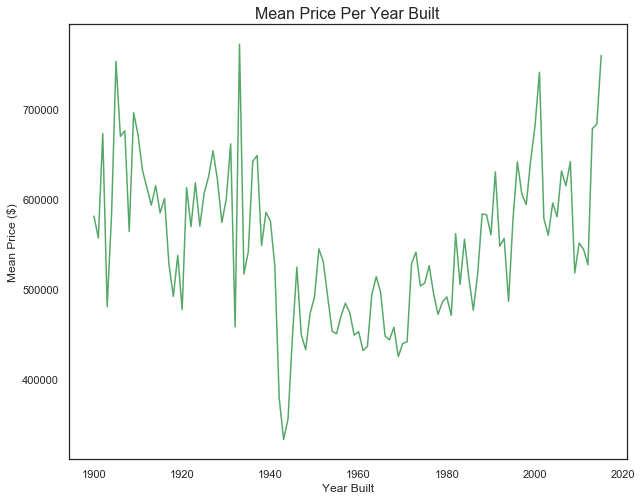

In [28]:
# Plot mean price per year built to see which years tend to have higher priced homes
plt.figure(figsize=(10, 8))
plt.plot(kch_data.groupby('yr_built')['price'].mean(),color='g')
plt.xlabel('Year Built')
plt.ylabel('Mean Price ($)')
plt.title('Mean Price Per Year Built', fontdict={'fontsize': 16})

While there is some fluctuation here, it does look like homes built more recently tend to sell for higher prices. Something to keep in mind is that there are many more houses built recently (i.e. 559 in 2014 compared to 45 in 1904), which could explain why we are seeing some higher than expected prices for some of the older homes. 

Now that we are done with investigating the yr_renovated data, I will tranfsorm this data by doing binning to assign each data into having been renovated vs. not having been renovated. 

In [29]:
# Do binning for yr_renovated and then do one hot encoding, drop original columns, and add new dummy column
bins = [-1, 1, kch_data.yr_renovated.max()]
labels = ["0","1"]
kch_data.yr_renovated = pd.cut(kch_data['yr_renovated'], bins, labels=labels)
kch_data.yr_renovated = kch_data.yr_renovated.astype('category')
yr_renovated_dummies = pd.get_dummies(kch_data.yr_renovated, prefix='yr_renovated', drop_first=True)
kch_data = kch_data.drop(["yr_renovated"], axis=1)
kch_data = pd.concat([kch_data, yr_renovated_dummies], axis=1)

### Normalization, Outliers, and Feature Scaling

Having normally distributed data can help with our analysis, so it is good to transform any non-normal data.

In [30]:
# Take an initial look at the data to see what we are dealing with
kch_data.iloc[:, :12].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,7.657915,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,1.173200,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,3.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,7.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,7.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,8.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,13.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


It looks like some of our data is pretty negatively skewed so we will want to normalize those. Specifically, price, bedrooms, bathrooms, and all of the sqft columns stand out to me.  I will start by investigating bedrooms and bathrooms.

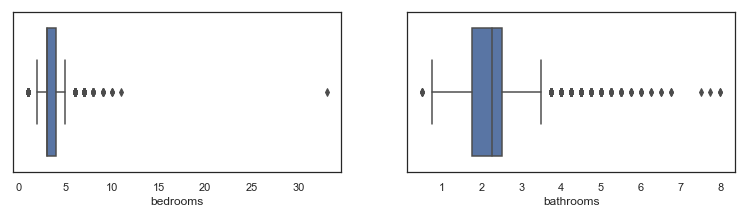

In [31]:
# Create boxplots to have a better visual of if outliers exist
plt.figure(figsize=(20,10))
plt.subplot(331)
sns.boxplot(kch_data.bedrooms)
plt.subplot(332)
sns.boxplot(kch_data.bathrooms)


#### Outliers
Both seem to have some outliers, so lets go ahead and remove those.

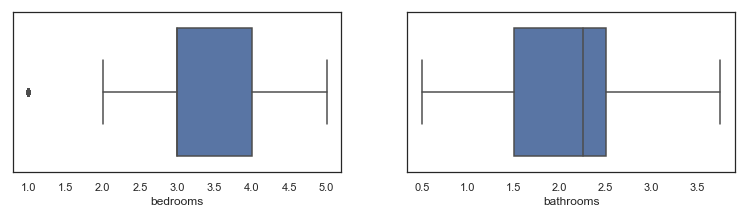

In [32]:
# Remove outliers above appropriate values:
kch_data = kch_data[kch_data['bedrooms'] < 6]
kch_data = kch_data[kch_data['bathrooms'] < 4]

# Check boxplots to make sure no other outliers remain:
plt.figure(figsize=(20,10))
plt.subplot(331)
sns.boxplot(kch_data.bedrooms)
plt.subplot(332)
sns.boxplot(kch_data.bathrooms)

Great, these plots both look better! Now for price and the sqft columns, lets perform log transformation to normalize these values.

#### Normalization

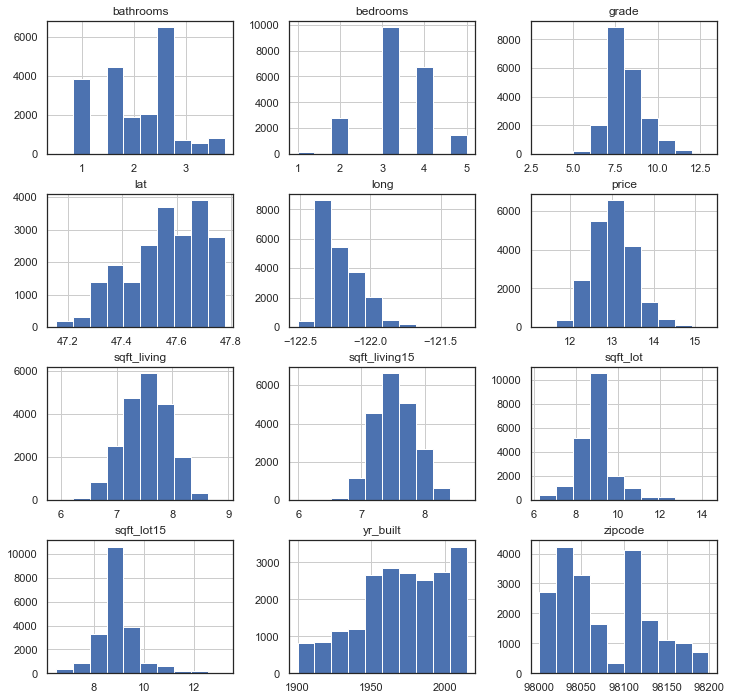

In [33]:
kch_data.price = np.log(kch_data.price)
kch_data.sqft_living = np.log(kch_data.sqft_living)
kch_data.sqft_lot = np.log(kch_data.sqft_lot)
kch_data.sqft_living15 = np.log(kch_data.sqft_living15)
kch_data.sqft_lot15 = np.log(kch_data.sqft_lot15)

import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
kch_data.iloc[:,:12].hist(ax = ax);

This looks much better! Taking a closer look at these charts, I do notice that some of the features appear to have different scales. This variation could give false impressions of the importance of each variable in our model, so it is important to scale our features to be more comparable to each other. Lets go ahead and perform min-max feature scaling on the features we just normalzied.

#### Feature Scaling

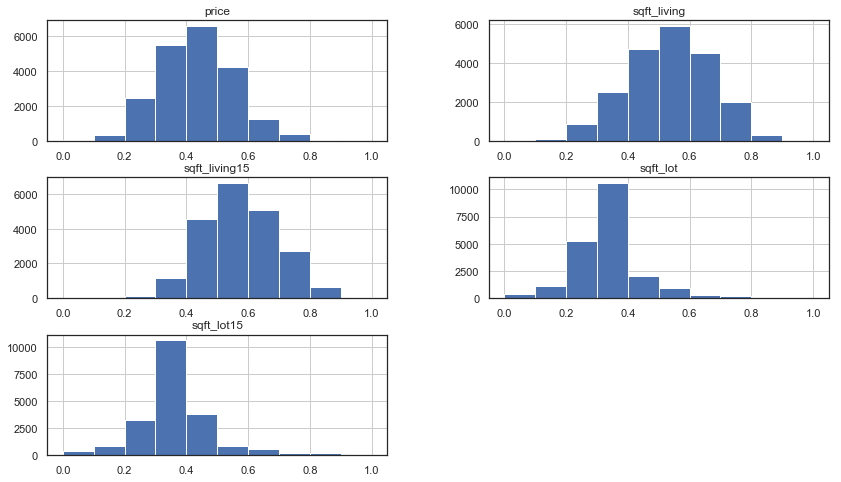

In [34]:
# Min-max Feature scaling
price = kch_data['price']
sqft_living = kch_data['sqft_living']
sqft_lot = kch_data['sqft_lot']
sqft_living15 = kch_data['sqft_living15']
sqft_lot15 = kch_data['sqft_lot15']

kch_data.price = (price-min(price))/(max(price)-min(price))
kch_data.sqft_living = (sqft_living-min(sqft_living))/(max(sqft_living)-min(sqft_living))
kch_data.sqft_lot = (sqft_lot-min(sqft_lot))/(max(sqft_lot)-min(sqft_lot))
kch_data.sqft_living15 = (sqft_living15-min(sqft_living15))/(max(sqft_living15)-min(sqft_living15))
kch_data.sqft_lot15 = (sqft_lot15-min(sqft_lot15))/(max(sqft_lot15)-min(sqft_lot15))


# Chart scaled features to confirm that they look more normal
features_scaled= pd.DataFrame([])
features_scaled['price'] = kch_data.price
features_scaled['sqft_living'] = kch_data.sqft_living
features_scaled['sqft_lot'] = kch_data.sqft_lot
features_scaled['sqft_living15'] = kch_data.sqft_living15
features_scaled['sqft_lot15'] = kch_data.sqft_lot15

features_scaled.hist(figsize  = [14, 8]);

# Part 4: Model

Now that our data is all ready for us, lets start to create a linear regression model.
### Build Model

In [35]:
# Set X and y and split data into train and test sets.
X = kch_data.drop(['price'],axis=1)
y = kch_data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Perform linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

# Calculate residuals
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

# Evaluate errors
print('Total R-Squared',linreg.score(X, y))
print('Train R-Squared',linreg.score(X_train, y_train))
print('Test R-Squared',linreg.score(X_test, y_test))
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
print('% MSE Difference', (test_mse - train_mse)/train_mse)

Total R-Squared 0.7580835912136441
Train R-Squared 0.7596606491676081
Test R-Squared 0.7543213663624714
Train Mean Squarred Error: 0.0037567874217174176
Test Mean Squarred Error: 0.0037554703630217176
% MSE Difference -0.0003505811077002401


We end up with a pretty decent total R-Squared score of ~.0758 and our individual train and test R-Squared scores and Mean Squared Errors are pretty similar to each other which is great! 

### Cross Validation
Lets do K-Fold Cross Validation which will split the entire dataset into {k} groups of data. This method of cross validation limits the affect of 'noise' in the data. If we were to just use one group of training data rather than splitting it up as cross validation does, we could run into the issue of our model being too fitted to just that specific training group, and it may not adapt as well to other sets of data.

In [36]:
# Cross Validation
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="r2"))
print('Cross Validation Results:', cv_10_results)

Cross Validation Results: 0.7532268853121133


### Feature Selection
While our model seems to be performing well, lets see if we can improve the model by picking the best predictors and removing any that are making our model less accurate. To do this, lets use a step-wise function, which will help us choose predictors with the lowest p-values.

In [37]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [38]:
# See results of stepwise selection
stepwise_result = stepwise_selection(X_train, y_train, verbose = True)
print('Features Selected:',sorted(stepwise_result))
print('# of Selected Features:',len(stepwise_result))
print('# of Original Features:',X_train.shape[1])

Add  bedrooms                       with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  view_4.0                       with p-value 2.47585e-96
Add  sqft_living15                  with p-value 5.05942e-71
Add  bathrooms                      with p-value 8.41369e-79
Add  waterfront_1.0                 with p-value 2.14791e-33
Add  condition_3                    with p-value 3.36751e-31
Add  sqft_lot15                     with p-value 6.4116e-35
Add  view_3.0                       with p-value 2.98354e-29
Add  view_2.0                       with p-value 8.96411e-31
Add  zipcode                        with p-value 2.87129e-24
Add  view_1.0                       with p-value 3.93926e-20
Add  condition_2                    with p-value 5.18351e-14
Add  condition_5                    with p-value 3.21888e-12
Add 

It looks like 25 of the 27 features we had were selected. Lets do OLS to check the p-values of our selected features and see if the R-Squared value improves with the new model.

In [39]:
#OLS calculation
X_with_intercept = sm.add_constant(sm.add_constant(X_train[sorted(stepwise_result)]))
model_selected = sm.OLS(y_train,X_with_intercept).fit()
print(model_selected.summary())

print('Original R-Squared:', linreg.score(X, y))
print('New R-Squared:', model_selected.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1850.
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:39:42   Log-Likelihood:                 20129.
No. Observations:               14660   AIC:                        -4.021e+04
Df Residuals:                   14634   BIC:                        -4.001e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5539      1.110     -2.

# Part 5: Interpret

We have built a pretty accurate model and have tried to improve that model by selecting only the important variables and rejecting ones that may have negative impacts on our model.  With our final model, all of our P-values are less than the .05 threshold and we can say that 76% of the variation in price can be explained by our features. While slightly higher, it looks like our new R-squared value is very similar to our original R-squared value. Therefore, while our model looks pretty good, it seems like there is still room for improvement since our initial attempt to improve the model did not have a significant impact.

Lets look specifically at a few of our feature coefficients to see their impact. The lat, sqft_living, sqft_living15, and waterfront features seem to have the highest coefficients, meaning that they will have a stronger impact on the changes in price. The basement coefficient is pretty close to zero, indicating that whether or not a house has a basement does not affect the price very much.  The bedrooms feature is also close to zero, but on the negative side. This one seems a bit odd to me as I would have expected houses with more bedrooms to cost more, but this is indicating that the number of bedrooms does not have a huge impact on price, and if anything has a slightly negative impact.